# REDFIN HOUSING 2023 DATA PREPROCESSING AND ANALYSIS

## Data-preprocessing 

-Extract 2023 data 

-Drop city column as it has 100% missing value 

-Identify the columns with the missing values and populating the appropriate values for it

In [1]:
import pandas as pd 
df = pd.read_csv('pandas_Redffin_housing_data (1).csv')
df.head(5)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2023-08-01,2023-08-31,30,county,5,2559,f,"Cocke County, TN",NaN,Tennessee,...,-0.061617,0.258427,-0.037028,0.105885,0.458333,0.125000,0.333333,"Newport, TN",35460.0,2024-02-11 14:26:11
1,2016-06-01,2016-06-30,30,county,5,579,f,"Houston County, GA",NaN,Georgia,...,0.042244,NaN,NaN,NaN,0.022727,-0.017273,-0.071023,"Warner Robins, GA",47580.0,2024-02-11 14:26:11
2,2014-07-01,2014-07-31,30,county,5,1297,f,"Franklin County, ME",NaN,Maine,...,-0.001923,NaN,NaN,NaN,0.000000,0.000000,0.000000,Maine nonmetropolitan area,NaN,2024-02-11 14:26:11
3,2018-10-01,2018-10-31,30,county,5,1459,f,"Hubbard County, MN",NaN,Minnesota,...,0.087045,0.099291,-0.053252,0.017324,0.181818,-0.010490,-0.133971,Minnesota nonmetropolitan area,NaN,2024-02-11 14:26:11
4,2014-10-01,2014-10-31,30,county,5,3246,f,"Lincoln County, WY",NaN,Wyoming,...,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,Wyoming nonmetropolitan area,NaN,2024-02-11 14:26:11


Extracting 2023 year data

In [2]:
df['period_begin'] = pd.to_datetime(df['period_begin'])
df_2023 = df[df['period_begin'].dt.year == 2023]
df_2023.shape

(98673, 58)

Identity the missing values columns

In [3]:
df_2023.isnull().sum()

period_begin                          0
period_end                            0
period_duration                       0
region_type                           0
region_type_id                        0
table_id                              0
is_seasonally_adjusted                0
region                                0
city                              98673
state                                 0
state_code                            0
property_type                         0
property_type_id                      0
median_sale_price                   100
median_sale_price_mom              9077
median_sale_price_yoy              8766
median_list_price                  6975
median_list_price_mom             13617
median_list_price_yoy             13919
median_ppsf                         832
median_ppsf_mom                    9684
median_ppsf_yoy                    9411
median_list_ppsf                   6993
median_list_ppsf_mom              13640
median_list_ppsf_yoy              13946


Drop city column

In [4]:
df_2023 = df_2023.drop(columns=['city'])

Calculating missing value percentage

In [5]:
Total_2023_records=df_2023.shape[0]*df_2023.shape[1]
Total_missing_values=df_2023.isnull().sum().sum()
print(f'Total_2023_records {Total_2023_records} Total missing values {Total_missing_values}')
print(f' percentage of missing values {(Total_missing_values/Total_2023_records)*100}%')


Total_2023_records 5624361 Total missing values 475948
 percentage of missing values 8.462259090410448%


In [6]:
df_2023.to_csv('redfin_data_2023.csv', index=False)

Replacing median sale price missing values by overall mean value

In [7]:

df_2023['median_sale_price'] = df_2023['median_sale_price'].fillna(df_2023['median_sale_price'].mean())
df_2023['median_sale_price_mom'] = df_2023['median_sale_price_mom'].fillna(df_2023['median_sale_price_mom'].mean())
df_2023['median_sale_price_yoy'] = df_2023['median_sale_price_yoy'].fillna(df_2023['median_sale_price_yoy'].mean())

Replacing median list price missing values by overall mean value

In [8]:
df_2023['median_list_price'] = df_2023['median_list_price'].fillna(df_2023['median_list_price'].mean())
df_2023['median_list_price_mom'] = df_2023['median_list_price_mom'].fillna(df_2023['median_list_price_mom'].mean())
df_2023['median_list_price_yoy'] = df_2023['median_list_price_yoy'].fillna(df_2023['median_list_price_yoy'].mean())

Replacing median ppsf (price per sqft) price missing values by mean value of each property type

In [9]:
# Convert columns to numeric data types
numeric_cols = ['median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy']
df_2023[numeric_cols] = df_2023[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Iterate over each property type
for property_type in df_2023['property_type'].unique():
    # Filter the DataFrame for the current property type
    property_df = df_2023[df_2023['property_type'] == property_type]
    
    # Calculate mean for each numeric column
    property_means = property_df[numeric_cols].mean()
    
    # Fill null values with the mean for the current property type
    df_2023.loc[df_2023['property_type'] == property_type, numeric_cols] = df_2023.loc[df_2023['property_type'] == property_type, numeric_cols].fillna(property_means)
    print(property_type)
    print(property_means)



All Residential
median_ppsf        166.937223
median_ppsf_mom      0.147202
median_ppsf_yoy      0.196475
dtype: float64
Single Family Residential
median_ppsf        166.942187
median_ppsf_mom      0.146383
median_ppsf_yoy      0.195361
dtype: float64
Condo/Co-op
median_ppsf        264.304967
median_ppsf_mom      0.228057
median_ppsf_yoy      0.117198
dtype: float64
Townhouse
median_ppsf        222.360757
median_ppsf_mom      0.100934
median_ppsf_yoy      0.155654
dtype: float64
Multi-Family (2-4 Unit)
median_ppsf        180.882556
median_ppsf_mom      0.516496
median_ppsf_yoy      0.390827
dtype: float64


Replacing median list ppsf (price per sqft) price missing values by mean value of each property type

In [10]:
# Convert columns to numeric data types
numeric_cols_listprice = ['median_list_ppsf', 'median_list_ppsf_mom', 'median_list_ppsf_yoy']
df_2023[numeric_cols_listprice] = df_2023[numeric_cols_listprice].apply(pd.to_numeric, errors='coerce')

# Iterate over each property type
for property_type in df_2023['property_type'].unique():
    # Filter the DataFrame for the current property type
    property_df = df_2023[df_2023['property_type'] == property_type]
    
    # Calculate mean for each numeric column
    property_means = property_df[numeric_cols_listprice].mean()
    
    # Fill null values with the mean for the current property type
    df_2023.loc[df_2023['property_type'] == property_type, numeric_cols_listprice] = df_2023.loc[df_2023['property_type'] == property_type, numeric_cols_listprice].fillna(property_means)

Replacing home sold missing values by mean value of each month

In [11]:
df_2023['period_begin'] = pd.to_datetime(df_2023['period_begin'])
df_2023['month'] = df_2023['period_begin'].dt.month
# Group by month and calculate mean of 'homes_sold'
monthly_means = df_2023.groupby('month')['homes_sold'].mean()
monthly_means
# Fill null values in 'homes_sold' column with corresponding mean for each month
for month, mean_homes_sold in monthly_means.items():
    df_2023.loc[df_2023['month'] == month, 'homes_sold'] = df_2023.loc[df_2023['month'] == month, 'homes_sold'].fillna(mean_homes_sold)
    print(month,mean_homes_sold)
# Drop the 'month' column if no longer needed
#df_2023.drop(columns=['month'], inplace=True)

1 51.27031869960322
2 58.247718052738335
3 75.3700012009127
4 71.03335384615384
5 82.98552804688434
6 87.54126270986049
7 76.35792646172393
8 81.51039451925348
9 71.99116945107399
10 69.42888138862102
11 63.7144091863193
12 61.93839097557952


Verify missing value count

In [13]:
df_2023.isnull().sum()

period_begin                          0
period_end                            0
period_duration                       0
region_type                           0
region_type_id                        0
table_id                              0
is_seasonally_adjusted                0
region                                0
state                                 0
state_code                            0
property_type                         0
property_type_id                      0
median_sale_price                     0
median_sale_price_mom                 0
median_sale_price_yoy                 0
median_list_price                     0
median_list_price_mom                 0
median_list_price_yoy                 0
median_ppsf                           0
median_ppsf_mom                       0
median_ppsf_yoy                       0
median_list_ppsf                      0
median_list_ppsf_mom                  0
median_list_ppsf_yoy                  0
homes_sold                            0


## PROPOSED QUESTIONS

Import libraries and Redfin housing dataset

In [14]:
#Import required libraries and read the file in CSV format.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
housing_data = pd.read_csv('redfin_data_2023.csv')

Q1.In what way are the maximum, minimum, and average home sales vary across different property types?

In [15]:
#define a function to calculate maximum, minimum, and average home sales
def property_type_analysis(housing_data):
    # Group by 'property_type' and calculate the maximum ,minimum  and avg number of homes sold
    temp = housing_data.groupby('property_type')['homes_sold'].agg(['max', 'min','mean']).reset_index()
    return temp

In [16]:
max_min_avg_home_sold= property_type_analysis(housing_data)
print(max_min_avg_home_sold.to_string(index=False))
print(max_min_avg_home_sold[max_min_avg_home_sold['property_type']=='All Residential'])

            property_type    max  min       mean
          All Residential 6444.0  1.0 105.044550
              Condo/Co-op 2168.0  1.0  31.685307
  Multi-Family (2-4 Unit)  379.0  1.0   7.371951
Single Family Residential 5238.0  1.0  84.627158
                Townhouse 1277.0  1.0  26.532289
     property_type     max  min       mean
0  All Residential  6444.0  1.0  105.04455


Q2.How is the study of home listings and pricing vary based on the chosen county and property type?

In [17]:
#County and property type analysis
def calculate_avg_prices(housing_data):
    # Get user input for county and property type
    county = input("Enter the county: ")
    property_type = input("Enter the property type: ")
    # county='Cocke County, TN'
    # property_type='All Residential'
    print(f'Calculating for county: {county} and property type {property_type}')
    # Filter the dataset based on user input
    filtered_data = housing_data[(housing_data['region'] == county) & (housing_data['property_type'] == property_type)]
    
    # Calculate average list price, average sale price, average PPSF list price, and average PPSF sale price
    total_listing = filtered_data['inventory'].count()
    home_sold = filtered_data['homes_sold'].count()
    avg_list_price = filtered_data['median_list_price'].mean()
    avg_sale_price = filtered_data['median_sale_price'].mean()
    
    # Display the results
    print(f"Total listings: {total_listing}")
    print(f"Total home sold: {home_sold}")
    print(f"Average List Price: ${avg_list_price:.2f}")
    print(f"Average Sale Price: ${avg_sale_price:.2f}")

In [18]:
calculate_avg_prices(housing_data)

Calculating for county: Cocke County, TN and property type All Residential
Total listings: 12
Total home sold: 12
Average List Price: $301482.46
Average Sale Price: $248399.96


Q3.What is the regular monthly total sales for the period through the year 2023, and how do we visually present those using a line graph?

In [19]:
#total sales for each month
def total_Sales_per_month(housing_data):
    housing_data['period_begin'] = pd.to_datetime(housing_data['period_begin'])

    # Extract month from 'period_begin'
    housing_data['month'] = housing_data['period_begin'].dt.month

    # Group by month and calculate total sale price for each month
    total_sale_price_per_month = housing_data.groupby('month')['median_sale_price'].sum()/10000000
    print(total_sale_price_per_month)
    # Plot the line graph
    plt.plot(total_sale_price_per_month.index, total_sale_price_per_month.values, marker='o', linestyle='-')
    plt.title('Total Sale Price Per Month')
    plt.xlabel('Month')
    plt.ylabel('Total Sale Price (Billions)')
    # Use month abbreviations on the x-axis
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  
    # Format y-axis tick labels to display values in millions
    plt.gca().yaxis.set_major_formatter('${:.0f}B'.format)
    plt.grid(True)
    plt.show()

month
1     215.802992
2     216.771846
3     234.164103
4     233.560431
5     245.445120
6     258.773824
7     246.967610
8     256.033984
9     251.251699
10    247.891097
11    240.814134
12    239.343868
Name: median_sale_price, dtype: float64


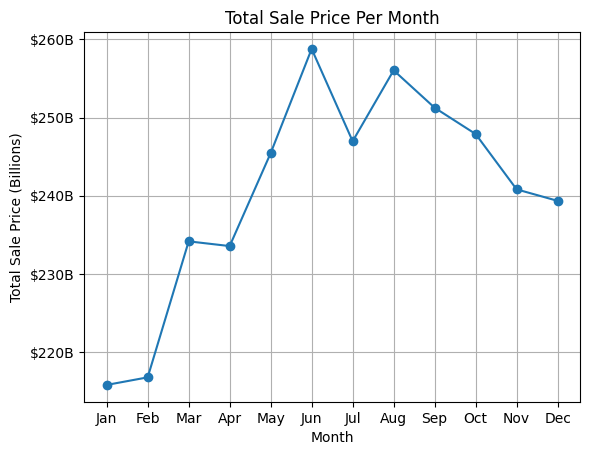

In [20]:
total_Sales_per_month(housing_data)

Q4.Which state has maximum sales?

In [21]:
#Which state has maximum sales

def Maximum_sales_state(housing_data):
    # Group by 'state' and calculate the total sales for each state
    total_sales_per_state = housing_data.groupby('state')['median_sale_price'].sum()

    # Convert total sales to billions
    total_sales_per_state_billion = total_sales_per_state / 1000000000  # Convert to billions

    # Find the state with maximum sales
    max_sales_state = total_sales_per_state_billion.idxmax()
    max_sales_amount = total_sales_per_state_billion.max()

    print(f"The state with the maximum sales is {max_sales_state} with total sales of {max_sales_amount:.2f} billion dollars.")

In [22]:
Maximum_sales_state(housing_data)

The state with the maximum sales is Texas with total sales of 1.79 billion dollars.


Q5.How does the analysis of home listings vary on a monthly basis, and could you plot a side-by-side graph to visualize these differences?

In [23]:
#Monthly home listing analysis

def monthly_analysis(housing_data):
    # Convert 'period_begin' to datetime format
    housing_data['period_begin'] = pd.to_datetime(housing_data['period_begin'])

    # Extract month from 'period_begin'
    housing_data['month'] = housing_data['period_begin'].dt.strftime('%b')
    housing_data['total_off_market_count'] = housing_data['off_market_in_two_weeks'] * housing_data['inventory'] 

    # Group by month and calculate total inventory, total new listings, and total off-market listings
    monthly_stats = housing_data.groupby('month').agg(
        total_inventory=('inventory', 'sum'),
        total_new_listings=('new_listings', 'sum'),
        total_off_market=('total_off_market_count', 'sum')
    ).reset_index()


    # Define the order of months
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Convert month to categorical data type with the correct order
    monthly_stats['month'] = pd.Categorical(monthly_stats['month'], categories=month_order, ordered=True)

    # Sort DataFrame based on month
    monthly_stats = monthly_stats.sort_values(by='month')  

    # Display the results
    print(monthly_stats.to_string(index=False))

    # Plotting
    # Set the width of the bars
    bar_width = 0.3

    # Define the x-axis positions for each category
    x_indexes = np.arange(len(monthly_stats['month']))
    #x_indexes = monthly_stats.index

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot total inventory
    plt.bar(x_indexes - bar_width, monthly_stats['total_inventory'], width=bar_width, color='skyblue', label='Total Inventory')
    
    # Plot total new listings
    plt.bar(x_indexes, monthly_stats['total_new_listings'], width=bar_width, color='orange', label='Total New Listings', alpha=0.7)
    
    # Plot total off-market listings
    plt.bar(x_indexes + bar_width, monthly_stats['total_off_market'], width=bar_width, color='green', label='Total Off-Market Listings', alpha=0.7)

    plt.xlabel('Month')
    plt.ylabel('Inventory')
    plt.title('Monthly Home Listing Analysis')
    plt.legend()
    plt.xticks(ticks=x_indexes, labels=monthly_stats['month'], rotation=45)
    plt.tight_layout()
    plt.show()

month  total_inventory  total_new_listings  total_off_market
  Jan        1436640.0            561038.0     435590.910458
  Feb        1394497.0            579665.0     511328.099577
  Mar        1409105.0            768889.0     533234.701771
  Apr        1424562.0            748404.0     549359.503064
  May        1476311.0            850985.0     564750.354958
  Jun        1534547.0            855081.0     549802.292864
  Jul        1565108.0            773777.0     530879.690563
  Aug        1605784.0            803489.0     533166.835462
  Sep        1664589.0            742267.0     529536.182358
  Oct        1685924.0            714924.0     507641.626145
  Nov        1633104.0            579277.0     433817.799484
  Dec        1450003.0            408703.0     344605.194070


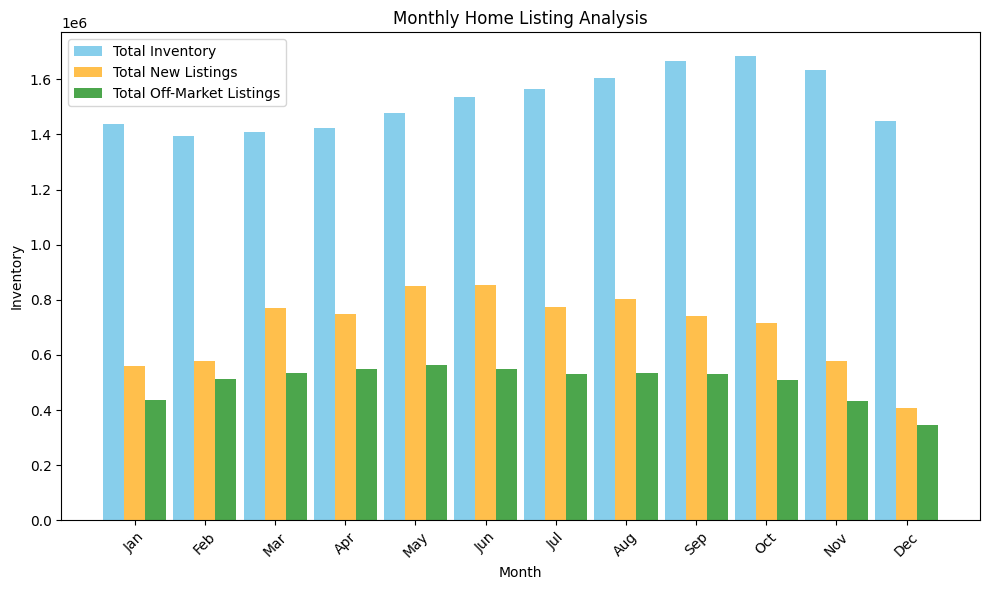

In [24]:
monthly_analysis(housing_data)

Q6.List the top 10 states with maximum sales

Top 10 states with highest total sales (in billions):
         state Total Sales (Billion)
    Washington                $0.77B
     Tennessee                 $0.9B
      New York                 $1.0B
       Florida                 $1.1B
       Georgia                $1.22B
North Carolina                $1.22B
      Colorado                $1.38B
      Virginia                $1.59B
    California                $1.74B
         Texas                $1.79B


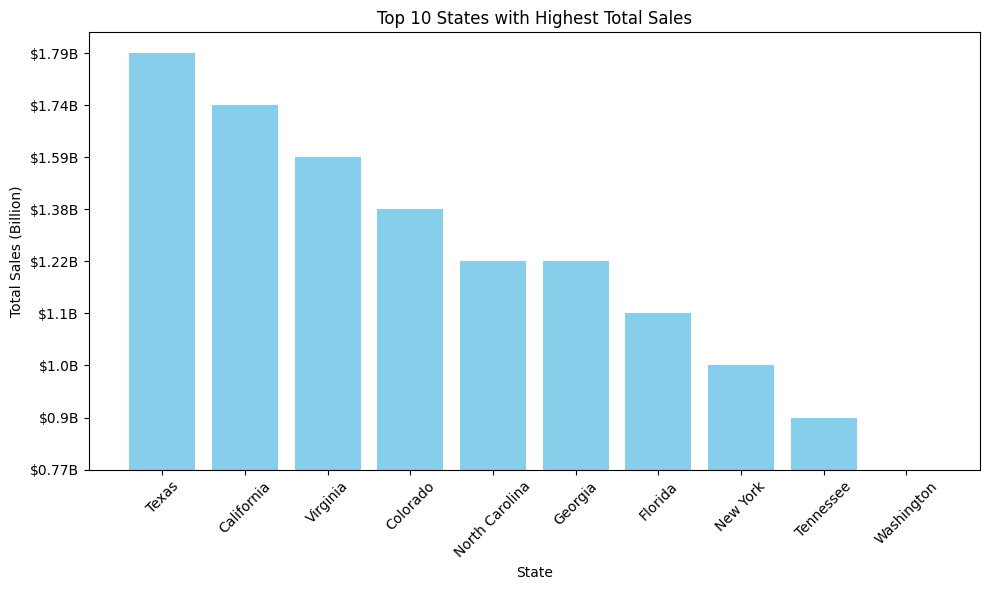

In [25]:
#top 10 state with max housing sale price

def state_maximum_sale_price(housing_data):

    # Group by 'state' and calculate the total sales for each state
    total_sales_per_state = housing_data.groupby('state')['median_sale_price'].sum() / 1000000000
    total_sales_per_state_billion = total_sales_per_state.round(2)  # Round to two decimal places

    # Sort states based on total sales and get the top 10 states
    top_10_states = total_sales_per_state_billion.nlargest(10)
    top_10_states = top_10_states.sort_values(ascending=True)  # Sort in ascending order
    top_10_states = top_10_states.reset_index().rename(columns={"median_sale_price": "Total Sales (Billion)"})
    top_10_states['Total Sales (Billion)'] = top_10_states['Total Sales (Billion)'].apply(lambda x: '$' + str(x) + 'B')

    # Display the top 10 states
    print("Top 10 states with highest total sales (in billions):")
    print(top_10_states.to_string(index=False))

    
    return top_10_states

def main():
    housing_data = pd.read_csv('redfin_data_2023.csv')
    top_10_states = state_maximum_sale_price(housing_data)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_states['state'], top_10_states['Total Sales (Billion)'], color='skyblue')
    plt.xlabel('State')
    plt.ylabel('Total Sales (Billion)')
    plt.title('Top 10 States with Highest Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.gca().invert_xaxis()  # Invert x-axis
    plt.show()

if __name__ == "__main__":
    main()



In [26]:
#top 10 state with max housing sale price

def state_maximum_sale_price(housing_data):

    # Group by 'state' and calculate the total sales for each state
    total_sales_per_state = housing_data.groupby('state')['median_sale_price'].sum() / 1000000000
    total_sales_per_state_billion = total_sales_per_state.round(2)  # Round to two decimal places

    # Sort states based on total sales and get the top 10 states
    top_10_states = total_sales_per_state_billion.nlargest(10)
    top_10_states = top_10_states.sort_values(ascending=True)  # Sort in ascending order
    top_10_states = top_10_states.reset_index().rename(columns={"median_sale_price": "Total Sales (Billion)"})
    top_10_states['Total Sales (Billion)'] = top_10_states['Total Sales (Billion)'].apply(lambda x: '$' + str(x) + 'B')

    # Display the top 10 states
    print("Top 10 states with highest total sales (in billions):")
    print(top_10_states.to_string(index=False))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_states['state'], top_10_states['Total Sales (Billion)'], color='skyblue')
    plt.xlabel('State')
    plt.ylabel('Total Sales (Billion)')
    plt.title('Top 10 States with Highest Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.gca().invert_xaxis()  # Invert x-axis
    plt.show()


